In [190]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psycopg2 # needed to get database exception errors when uploading dataframe

# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

# Specifies path for saving file
path ='data/'

# import sklearn.cluster as cluster
# import scipy.cluster.hierarchy as sch
# from sklearn.cluster import KMeans
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [191]:
# define the name of the csv file you want to read in
netflix = 'netflix_titles.csv'
amazon = 'amazon_prime_titles.csv'
disney = 'disney_plus_titles.csv'
rotten_tomatoes = 'rotten_tomatoes.csv'
subscribers_revenue = 'subscribers_revenue_data.csv'

# Read in your csv data 
df_netflix = pd.read_csv(path+netflix, low_memory = False)
display(df_netflix.shape)
display(df_netflix.head(3))

df_amazon = pd.read_csv(path+amazon, low_memory = False)
display(df_amazon.shape)
display(df_amazon.head(3))

df_disney = pd.read_csv(path+disney, low_memory = False)
display(df_disney.shape)
display(df_disney.head(3))

df_rotten_tomatoes = pd.read_csv(path+rotten_tomatoes, low_memory = False)
display(df_rotten_tomatoes.shape)
display(df_rotten_tomatoes.head(3))

df_subscribers_revenue = pd.read_csv(path+subscribers_revenue, delimiter = ';')
display(df_subscribers_revenue.shape)
display(df_subscribers_revenue.head())

# Read in your excel data 
# sub_rev = 'subscribers_revenue_data.xlsx'
# df_sub_rev = pd.read_excel(path + sub_rev)
# display(df_sub_rev.shape)
# display(df_sub_rev.head())



(8807, 12)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


(9668, 12)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


(1450, 12)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


(9515, 11)

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0


(16, 8)

,platform,year,annual_subscribers,revenue,prime_video_users,prime_video_users_revenue,content_spend,profit
0,netflix,2011,21600000,3100000000,NaN,NaN,NaN,225000000.0
1,netflix,2012,30360000,3500000000,NaN,NaN,NaN,17000000.0
2,netflix,2013,41430000,4300000000,NaN,NaN,NaN,112000000.0
3,netflix,2014,54480000,5400000000,NaN,NaN,NaN,266000000.0
4,netflix,2015,70840000,6700000000,NaN,NaN,NaN,122000000.0


In [192]:
df_subscribers_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   platform                   16 non-null     object 
 1   year                       16 non-null     int64  
 2   annual_subscribers         16 non-null     int64  
 3   revenue                    16 non-null     int64  
 4   prime_video_users          3 non-null      float64
 5   prime_video_users_revenue  3 non-null      float64
 6   content_spend              6 non-null      float64
 7   profit                     11 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ KB


In [193]:
df_subscribers_revenue.revenue.describe()

count    1.600000e+01
mean     1.360562e+10
std      1.015943e+10
min      2.800000e+09
25%      4.975000e+09
50%      1.020000e+10
75%      2.130000e+10
max      3.170000e+10
Name: revenue, dtype: float64

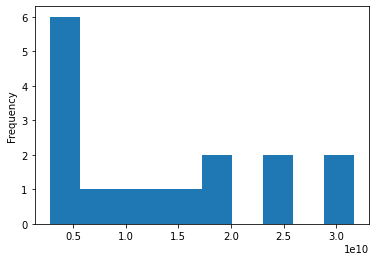

In [194]:
# revenue in bn (starts with 2,8 mm)
df_subscribers_revenue['revenue'].plot(kind='hist');

In [195]:
# subscribers in mm
df_subscribers_revenue.annual_subscribers.describe()

count    1.600000e+01
mean     1.132531e+08
std      6.347292e+07
min      2.160000e+07
25%      6.675000e+07
50%      1.143700e+08
75%      1.542725e+08
max      2.222000e+08
Name: annual_subscribers, dtype: float64

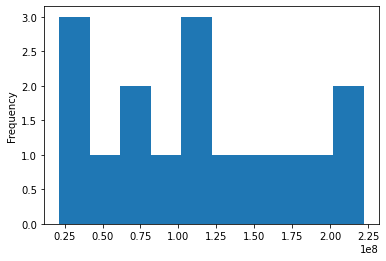

In [196]:
# subscribers in mm
df_subscribers_revenue['annual_subscribers'].plot(kind='hist');

In [197]:
# Show column names
display(df_netflix.columns)

display(df_amazon.columns)

display(df_disney.columns)

display(df_rotten_tomatoes.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')

In [198]:
# Show data type and non-null values
display(df_netflix.info())

display(df_amazon.info())

display(df_disney.info())

display(df_rotten_tomatoes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


None

In [199]:
# Rename columns
df_rotten_tomatoes.rename(columns =lambda x : x.lower(), inplace =  True)
df_rotten_tomatoes.rename(columns=lambda x : x.replace(" ", "_"), inplace= True)
df_rotten_tomatoes.rename(columns=lambda x : x.replace("year", "release_year"), inplace= True)

df_rotten_tomatoes.head()

,unnamed:_0,id,title,release_year,age,rotten_tomatoes,netflix,hulu,prime_video,disney+,type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [200]:
# With the next function, we make our csv file ready to be uploaded to SQL.
# We convert the datatypes
     
df_netflix['date_added']= pd.to_datetime(df_netflix['date_added'], yearfirst=True)

df_amazon['date_added']= pd.to_datetime(df_amazon['date_added'], yearfirst=True)

df_disney['date_added']= pd.to_datetime(df_disney['date_added'], yearfirst=True)

In [207]:
display(df_netflix.info())

display(df_amazon.info())

display(df_disney.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1450 non-null   object        
 1   type          1450 non-null   object        
 2   title         1450 non-null   object        
 3   director      977 non-null    object        
 4   cast          1260 non-null   object        
 5   country       1231 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1450 non-null   int64         
 8   rating        1447 non-null   object        
 9   duration      1450 non-null   object        
 10  listed_in     1450 non-null   object        
 11  description   1450 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 136.1+ KB


None

In [208]:
# Check null-values

display(df_netflix.isnull().sum())

display(df_amazon.isnull().sum())

display(df_disney.isnull().sum())

display(df_rotten_tomatoes.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

unnamed:_0            0
id                    0
title                 0
release_year          0
age                4177
rotten_tomatoes       7
netflix               0
hulu                  0
prime_video           0
disney+               0
type                  0
dtype: int64

In [209]:
# Push the prepared data to a table in the database

schema = 'capstone_project_hd' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database

table_name_sql = f'''SELECT COLUMN_NAME 
                    FROM INFORMATION_SCHEMA.COLUMNS 
                    WHERE TABLE_NAME = 'netflix_hd'
                    AND TABLE_SCHEMA ='{schema}'
                    ORDER BY ordinal_position'''
c_names = engine.execute(table_name_sql).fetchall() 
c_names

[]

In [210]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
table_name = 'netflix_hd'

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_netflix.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        #if_exists='append', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=10000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The netflix_hd table was imported successfully.


In [211]:
# Just to be sure: Check if the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_netflix.shape[0]

True

In [212]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
table_name = 'amazon_hd'

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_amazon.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        #if_exists='append', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=10000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The amazon_hd table was imported successfully.


In [213]:
# Just to be sure: Check if the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_amazon.shape[0]

True

In [214]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
table_name = 'disney_hd'

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_disney.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        #if_exists='append', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=10000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The disney_hd table was imported successfully.


In [215]:
# Just to be sure: Check if the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_disney.shape[0]

True

In [216]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
table_name = 'rotten_tomatoes_hd'

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_rotten_tomatoes.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        #if_exists='append', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=10000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The rotten_tomatoes_hd table was imported successfully.


In [217]:
# Just to be sure: Check if the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_rotten_tomatoes.shape[0]

True

In [218]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
table_name = 'subscribers_revenue_hd'

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_subscribers_revenue.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        #if_exists='append', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=10000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The subscribers_revenue_hd table was imported successfully.


In [219]:
# Just to be sure: Check if the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_subscribers_revenue.shape[0]

True